<a href="https://colab.research.google.com/github/Niyostiven/dft-hack/blob/main/patient_readmission_risks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
# Import the packages
import IPython
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from statistics import mode
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score


In [5]:
df=pd.read_csv("/content/diabetic_data.csv")
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6.0,25.0,1.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1.0,1.0,7.0,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1.0,1.0,7.0,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1.0,1.0,7.0,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1.0,1.0,7.0,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16681,62292276,8400114,Caucasian,Male,[10-20),?,1.0,1.0,7.0,2.0,...,No,Steady,No,No,No,No,No,No,Yes,NO
16682,62293302,388008,AfricanAmerican,Female,[50-60),?,1.0,18.0,7.0,10.0,...,No,No,No,No,No,No,No,No,No,>30
16683,62293638,635895,Caucasian,Male,[50-60),?,1.0,18.0,4.0,3.0,...,No,No,No,No,No,No,No,Ch,Yes,NO
16684,62297496,6648012,AfricanAmerican,Female,[60-70),?,1.0,1.0,7.0,5.0,...,No,Steady,No,No,No,No,No,Ch,Yes,<30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16686 entries, 0 to 16685
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              16686 non-null  int64  
 1   patient_nbr               16686 non-null  int64  
 2   race                      16685 non-null  object 
 3   gender                    16685 non-null  object 
 4   age                       16685 non-null  object 
 5   weight                    16685 non-null  object 
 6   admission_type_id         16685 non-null  float64
 7   discharge_disposition_id  16685 non-null  float64
 8   admission_source_id       16685 non-null  float64
 9   time_in_hospital          16685 non-null  float64
 10  payer_code                16685 non-null  object 
 11  medical_specialty         16685 non-null  object 
 12  num_lab_procedures        16685 non-null  float64
 13  num_procedures            16685 non-null  float64
 14  num_me

In [7]:
df.isnull().sum()

,0
encounter_id,0
patient_nbr,0
race,1
gender,1
age,1
weight,1
admission_type_id,1
discharge_disposition_id,1
admission_source_id,1
time_in_hospital,1


In [8]:
df.shape

(16686, 50)

In [9]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.668600e+04,1.668600e+04,16685.000000,16685.000000,16685.00000,16685.000000,16685.000000,16685.000000,16685.000000,16685.000000,16685.000000,16685.000000,16685.000000
mean,3.640655e+07,2.523155e+07,2.367216,5.876955,6.77309,4.739347,46.031226,1.455079,15.142283,0.105184,0.056098,0.541085,6.757087
std,1.670954e+07,3.258168e+07,1.777565,7.251313,5.03434,3.160566,18.290522,1.761144,8.096991,0.585242,0.455887,1.104987,2.044495
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.415266e+07,2.610587e+06,1.000000,1.000000,2.00000,2.000000,34.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000
50%,3.789186e+07,9.687015e+06,2.000000,1.000000,7.00000,4.000000,46.000000,1.000000,14.000000,0.000000,0.000000,0.000000,7.000000
75%,5.078708e+07,2.566379e+07,3.000000,6.000000,7.00000,6.000000,59.000000,2.000000,19.000000,0.000000,0.000000,1.000000,9.000000
max,6.229783e+07,1.151968e+08,8.000000,25.000000,20.00000,14.000000,129.000000,6.000000,62.000000,20.000000,25.000000,15.000000,9.000000


Drop columns you don’t need:

Clean the data

Let’s fix missing values (?) and remove columns that are not useful.

In [10]:
# These IDs don't help the model
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

In [11]:
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6.0,25.0,1.0,1.0,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1.0,1.0,7.0,3.0,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,1.0,1.0,7.0,2.0,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,1.0,1.0,7.0,2.0,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1.0,1.0,7.0,1.0,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [12]:
df["weight"].value_counts()

,count
weight,
?,16164
[75-100),225
[50-75),149
[100-125),70
[0-25),35
[25-50),25
[125-150),12
[150-175),3
[175-200),1


In [13]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

/tmp/ipython-input-13-4084823351.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


In [14]:
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6.0,25.0,1.0,1.0,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1.0,1.0,7.0,3.0,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1.0,1.0,7.0,2.0,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1.0,1.0,7.0,2.0,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1.0,1.0,7.0,1.0,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [15]:
# Drop columns with too much missing data
df.dropna(axis=1, thresh=len(df)*0.7, inplace=True)

# Drop rows with any remaining missing values
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0


In [17]:
# recheck the object data type
for i in df.columns:
    if df[i].dtype==object:
        d= df[i].value_counts()
        print(pd.DataFrame(d))

                 count
race                  
Caucasian        11876
AfricanAmerican   3438
Hispanic           318
Other              234
Asian               60
        count
gender       
Female   8509
Male     7417
          count
age            
[70-80)    4326
[60-70)    3513
[50-60)    2891
[80-90)    2029
[40-50)    1735
[30-40)     695
[90-100)    296
[20-30)     249
[10-20)     155
[0-10)       37
        count
diag_1       
414      1580
428      1243
786       778
410       746
486       447
...       ...
223         1
V71         1
839         1
685         1
V54         1

[502 rows x 1 columns]
        count
diag_2       
428      1100
250       969
276       900
427       738
401       656
...       ...
520         1
953         1
457         1
501         1
E900        1

[468 rows x 1 columns]
        count
diag_3       
250      2032
401      1448
414       729
276       638
428       610
...       ...
951         1
9           1
741         1
E941        1
170        

The dataset contains several columns indicating whether specific diabetes medications were prescribed and how their dosages changed. Most values were "No," meaning the drugs were not prescribed. For several medications (e.g., glimepiride-pioglitazone, examide), over 98% of records had "No", showing minimal variation.

To improve model performance, such columns were removed as they added little value. Columns with more informative variation (like insulin, change, and diabetesMed) were kept for analysis. This feature selection step helped reduce noise, simplify the model, and enhance its ability to predict patient readmission effectively.

In [18]:
df.shape

(15926, 43)

Drop columns that are almost all "No"

In [19]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2.0,1.0,2.0,3.0,31.0,6.0,16.0,...,No,Steady,No,No,No,No,No,No,Yes,>30


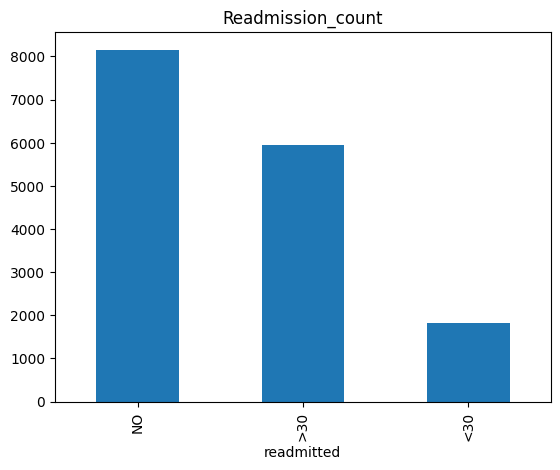

In [20]:
target_count=df['readmitted'].value_counts()
target_count.plot(kind='bar', title='Readmission_count');

The readmitted variable in the dataset captures whether a patient was readmitted to the hospital and the timing of that readmission. The data shows that 52,338 patients were not readmitted, 34,649 were readmitted after more than 30 days, and 11,066 were readmitted within 30 days of discharge. This distribution highlights that a significant portion of patients (over 10%) experienced early readmission, which is often associated with complications or insufficient post-discharge care.

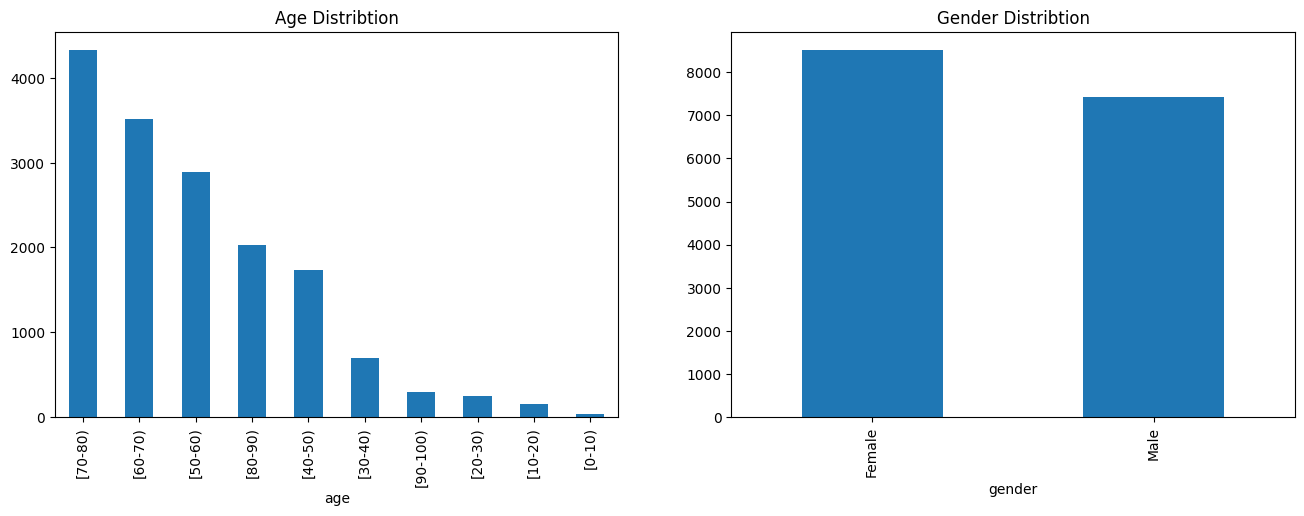

In [21]:
age_count=df["age"].value_counts()
gender_count=df["gender"].value_counts()# Have to deal with unkown/invalid count
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(16,5))
_ = age_count.plot(kind='bar',title='Age Distribtion',ax=ax1)
_ = gender_count.plot(kind='bar',title='Gender Distribtion',ax=ax2)

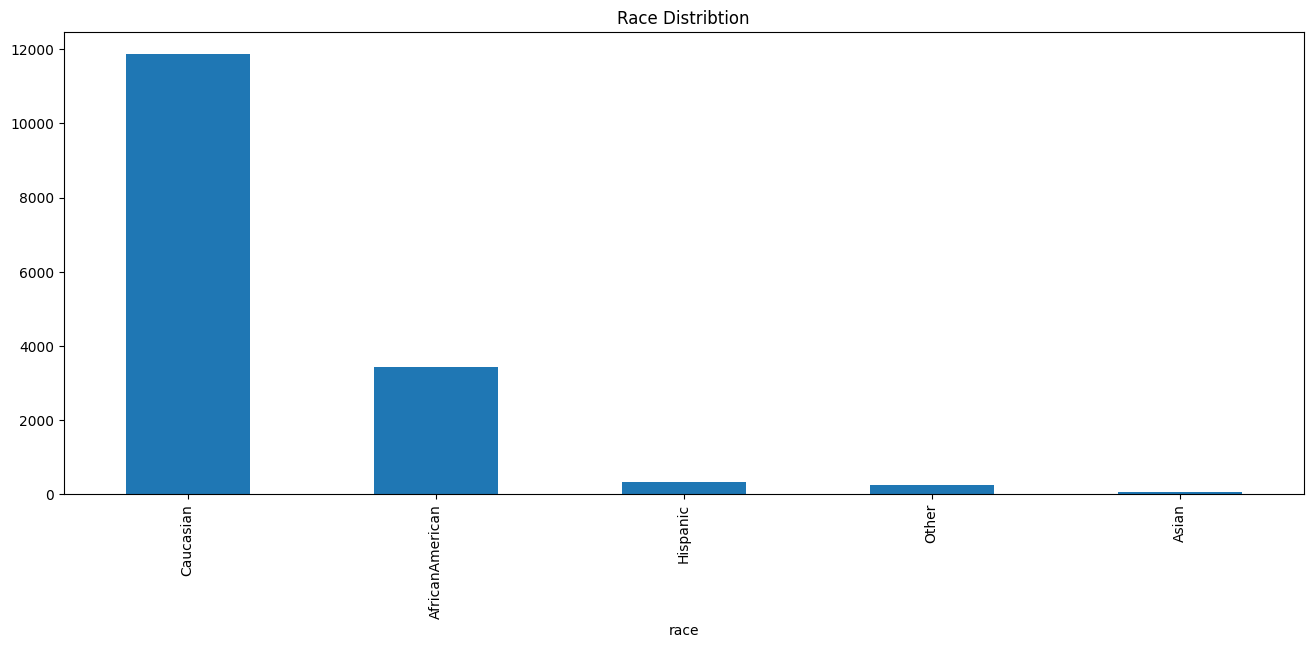

In [22]:
race_count=df["race"].value_counts()
fig,(ax1)= plt.subplots(1,figsize=(16,6))
_ = race_count.plot(kind='bar',title='Race Distribtion',ax=ax1)# Missing values

Numerical data Distribution

In [23]:
#num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
#sns.set()
#sns.pairplot(df[num_col], size = 2.5)
#plt.show();

In [24]:
df1 = []
# Checkthe percentage of the missing values
for col in df.columns:
    if df[col].dtype == object:
        count_missing = df[col][df[col] == '?'].count()
        percent_missing = (count_missing.sum()/df.shape[0]*100).round(2)
#         print(col,count_missing,percent_missing)
        df1.append([col,count_missing,percent_missing])
missing_value=pd.DataFrame(df1,columns=["col","count_missing","percent_missing"]).sort_values(by="percent_missing",ascending=False)
missing_value

,col,count_missing,percent_missing
0,race,0,0.0
1,gender,0,0.0
2,age,0,0.0
3,diag_1,0,0.0
4,diag_2,0,0.0
5,diag_3,0,0.0
6,metformin,0,0.0
7,repaglinide,0,0.0
8,nateglinide,0,0.0
9,chlorpropamide,0,0.0


In [25]:
df.shape

(15926, 43)

the target column

In [26]:
# Create a new column: 1 = readmitted, 0 = not readmitted
df['readmitted_flag'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

# Drop the original readmitted column
df.drop('readmitted', axis=1, inplace=True)


In [27]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_flag
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,Caucasian,Male,[50-60),2.0,1.0,2.0,3.0,31.0,6.0,16.0,...,No,Steady,No,No,No,No,No,No,Yes,1


Convert text columns into numbers

In [28]:
#le = LabelEncoder()
#for col in df.columns:
    #if df[col].dtype == 'object':
        #df[col] = le.fit_transform(df[col].astype(str))


In [29]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_flag
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,Caucasian,Male,[50-60),2.0,1.0,2.0,3.0,31.0,6.0,16.0,...,No,Steady,No,No,No,No,No,No,Yes,1


In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
df.nunique()

,0
race,5
gender,2
age,10
admission_type_id,7
discharge_disposition_id,19
admission_source_id,10
time_in_hospital,14
num_lab_procedures,109
num_procedures,7
num_medications,60


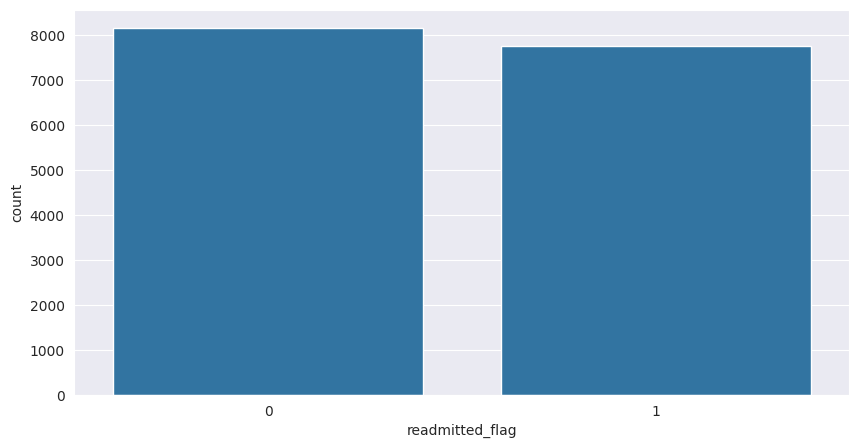

In [32]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.countplot(x=df["readmitted_flag"]);

Text(0.5, 1.0, 'Age')

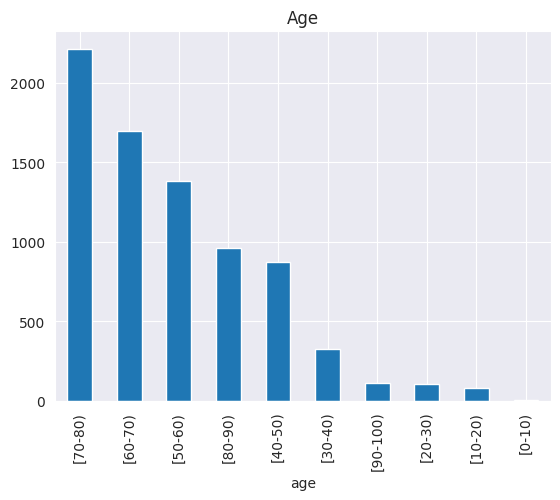

In [33]:
df.loc[df['readmitted_flag'].isin(['1','Yes',1]),'age'].value_counts().plot(kind='bar')
plt.title("Age")

In [34]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted_flag'],
      dtype='object')

In [35]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns
num_features

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'readmitted_flag'],
      dtype='object')

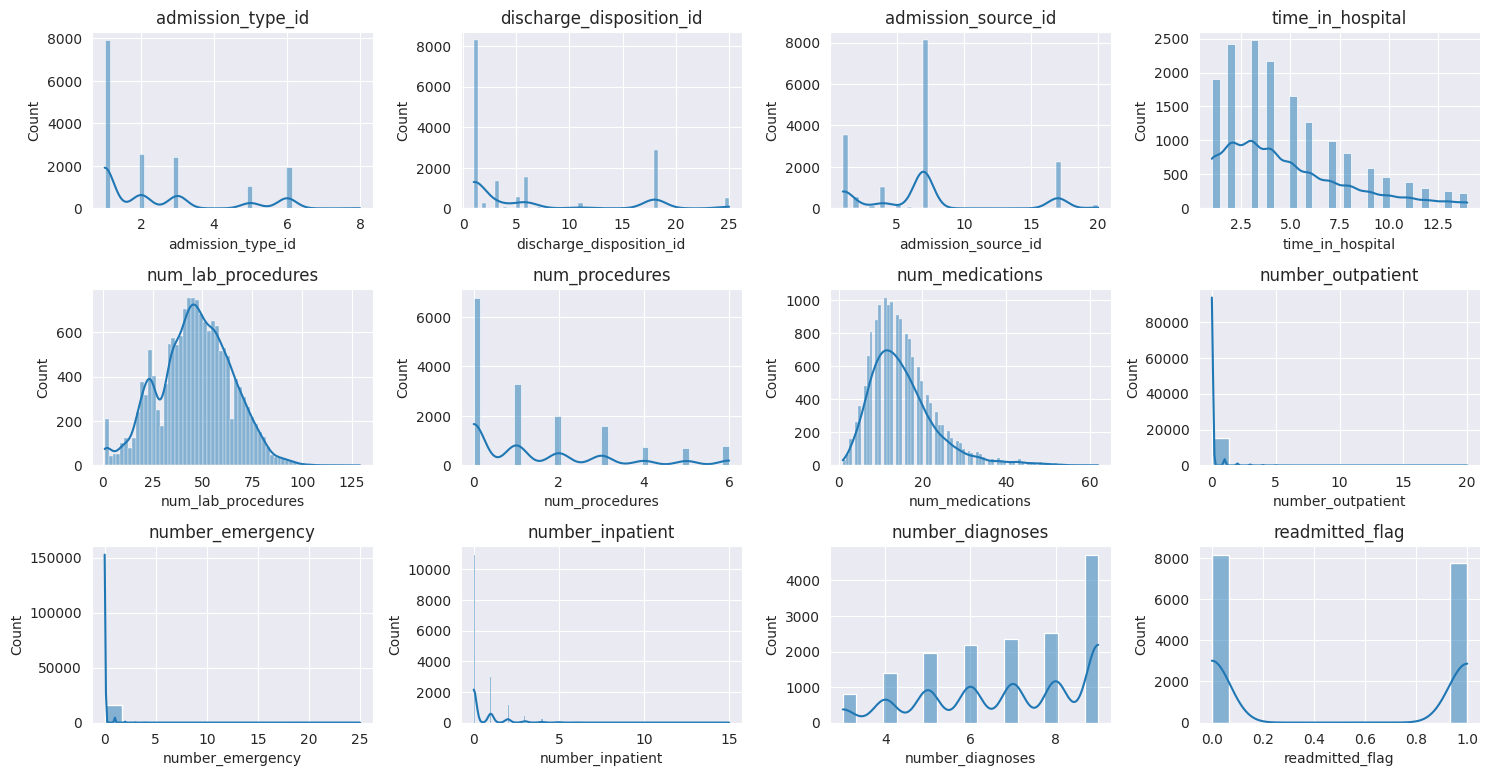

In [36]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Create new feature: patient_service

In [37]:
df['total_visits'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']


Create new feature: med_change

In [38]:
# Create a new variable to calculate the change of medication dose
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide',
        'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone',
        'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [39]:
for col in keys:
    col_name = str(col) + 'new' #change the column name
    df[col_name] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)# recode the med use into binary variable
df['med_change'] = 0
for col in keys:
    col_name = str(col) + 'new'
    df['med_change'] = df['med_change'] + df[col_name]
    del df[col_name]

In [40]:
# Check the status of the new feature med_change
df['med_change'].value_counts()

,count
med_change,
0,12560
1,3169
2,179
3,18


Create new feature: num_med

In [41]:
# calculate the number of medications used for each patient
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)
df['num_med'] = 0
for col in keys:
    df['num_med'] = df['num_med'] + df[col]

/tmp/ipython-input-41-2417374980.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace('Down', 1)
/tmp/ipython-input-41-2417374980.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace('Steady', 1)
/tmp/ipython-input-41-2417374980.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sil

In [42]:
df['num_med'].value_counts()

,count
num_med,
1,7526
0,4303
2,3148
3,824
4,117
5,6
6,2


Recode diagnosis into new categories

In [43]:
"""diag_1=primary diagnosis; diag_2=secondary diagnosis; diag_3=additional diagnosis\
i"""
# duplicate a diagnosis column
df['primary_diag'] = df['diag_1']
df['secondary_diag'] = df['diag_2']
df['additional_diag'] = df['diag_3']

In [44]:
# recode ICE code of V or E to “other” category = 0
df.loc[df['diag_1'].str.contains('V'), ['primary_diag']] = 0
df.loc[df['diag_1'].str.contains('E'), ['primary_diag']] = 0
df.loc[df['diag_2'].str.contains('V'), ['secondary_diag']] = 0
df.loc[df['diag_2'].str.contains('E'), ['secondary_diag']] = 0
df.loc[df['diag_3'].str.contains('V'), ['additional_diag']] = 0
df.loc[df['diag_3'].str.contains('E'), ['additional_diag']] = 0

In [45]:
# convert the data type to float to enable computations later
df['primary_diag'] = df['primary_diag'].astype(float)
df['secondary_diag'] = df['secondary_diag'].astype(float)
df['additional_diag'] = df['additional_diag'].astype(float)

In [46]:
# recode ICD codes of diag1,diag2,diag3 between certain ranges to certain categories
for index, row in df.iterrows():
    if (row['primary_diag'] >= 390 and row['primary_diag'] < 460) or (np.floor(row['primary_diag']) == 785):
        df.loc[index, 'primary_diag'] = 1
    elif (row['primary_diag'] >= 460 and row['primary_diag'] < 520) or (np.floor(row['primary_diag']) == 786):
        df.loc[index, 'primary_diag'] = 2
    elif (row['primary_diag'] >= 520 and row['primary_diag'] < 580) or (np.floor(row['primary_diag']) == 787):
        df.loc[index, 'primary_diag'] = 3
    elif (np.floor(row['primary_diag']) == 250):
        df.loc[index, 'primary_diag'] = 4
    elif (row['primary_diag'] >= 800 and row['primary_diag'] < 1000):
        df.loc[index, 'primary_diag'] = 5
    elif (row['primary_diag'] >= 710 and row['primary_diag'] < 740):
        df.loc[index, 'primary_diag'] = 6
    elif (row['primary_diag'] >= 580 and row['primary_diag'] < 630) or (np.floor(row['primary_diag']) == 788):
        df.loc[index, 'primary_diag'] = 7
    elif (row['primary_diag'] >= 140 and row['primary_diag'] < 240):
        df.loc[index, 'primary_diag'] = 8
    else:
        df.loc[index, 'primary_diag'] = 0

In [47]:
for index, row in df.iterrows():
    if (row['secondary_diag'] >= 390 and row['secondary_diag'] < 460) or (np.floor(row['secondary_diag']) == 785):
        df.loc[index, 'secondary_diag'] = 1
    elif (row['secondary_diag'] >= 460 and row['secondary_diag'] < 520) or (np.floor(row['secondary_diag']) == 786):
        df.loc[index, 'secondary_diag'] = 2
    elif (row['secondary_diag'] >= 520 and row['secondary_diag'] < 580) or (np.floor(row['secondary_diag']) == 787):
        df.loc[index, 'secondary_diag'] = 3
    elif (np.floor(row['secondary_diag']) == 250):
        df.loc[index, 'secondary_diag'] = 4
    elif (row['secondary_diag'] >= 800 and row['secondary_diag'] < 1000):
        df.loc[index, 'secondary_diag'] = 5
    elif (row['secondary_diag'] >= 710 and row['secondary_diag'] < 740):
        df.loc[index, 'secondary_diag'] = 6
    elif (row['secondary_diag'] >= 580 and row['secondary_diag'] < 630) or (np.floor(row['secondary_diag']) == 788):
        df.loc[index, 'secondary_diag'] = 7
    elif (row['secondary_diag'] >= 140 and row['secondary_diag'] < 240):
        df.loc[index, 'secondary_diag'] = 8
    else:
        df.loc[index, 'secondary_diag'] = 0

In [48]:
for index, row in df.iterrows():
    if (row['additional_diag'] >= 390 and row['additional_diag'] < 460) or (np.floor(row['additional_diag']) == 785):
        df.loc[index, 'additional_diag'] = 1
    elif (row['additional_diag'] >= 460 and row['additional_diag'] < 520) or (np.floor(row['additional_diag']) == 786):
        df.loc[index, 'additional_diag'] = 2
    elif (row['additional_diag'] >= 520 and row['additional_diag'] < 580) or (np.floor(row['additional_diag']) == 787):
        df.loc[index, 'additional_diag'] = 3
    elif (np.floor(row['additional_diag']) == 250):
        df.loc[index, 'additional_diag'] = 4
    elif (row['additional_diag'] >= 800 and row['additional_diag'] < 1000):
        df.loc[index, 'additional_diag'] = 5
    elif (row['additional_diag'] >= 710 and row['additional_diag'] < 740):
        df.loc[index, 'additional_diag'] = 6
    elif (row['additional_diag'] >= 580 and row['additional_diag'] < 630) or (np.floor(row['additional_diag']) == 788):
        df.loc[index, 'additional_diag'] = 7
    elif (row['additional_diag'] >= 140 and row['additional_diag'] < 240):
        df.loc[index, 'additional_diag'] = 8
    else:
        df.loc[index, 'additional_diag'] = 0

In [49]:
df[['diag_1','primary_diag']].head(15).T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
diag_1,276,648,8,197,414,414,428,398,434,250.7,157,428,428,518,999
primary_diag,0.0,0.0,0.0,8.0,1.0,1.0,1.0,1.0,1.0,4.0,8.0,1.0,1.0,2.0,5.0


In [50]:
df[['diag_2','secondary_diag']].head(15).T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
diag_2,250.01,250,250.43,157,411,411,492,427,198,403,288,250.43,411,998,507
secondary_diag,4.0,4.0,4.0,8.0,1.0,1.0,2.0,1.0,8.0,1.0,0.0,4.0,1.0,5.0,2.0


In [51]:
df[['diag_3','additional_diag']].head(15).T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
diag_3,255,V27,403,250,250,V45,250,38,486,996,197,250.6,427,627,996
additional_diag,0.0,0.0,1.0,4.0,4.0,0.0,4.0,0.0,2.0,5.0,8.0,4.0,1.0,7.0,5.0


In [52]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin-pioglitazone,change,diabetesMed,readmitted_flag,total_visits,med_change,num_med,primary_diag,secondary_diag,additional_diag
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,0,Ch,Yes,1,0.0,1,1,0.0,4.0,0.0
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,0,No,Yes,0,3.0,0,1,0.0,4.0,0.0
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,0,Ch,Yes,0,0.0,1,1,0.0,4.0,1.0
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,0,Ch,Yes,0,0.0,0,2,8.0,8.0,4.0
5,Caucasian,Male,[50-60),2.0,1.0,2.0,3.0,31.0,6.0,16.0,...,0,No,Yes,1,0.0,0,1,1.0,1.0,4.0


Recode admission_type_id and discharge_disposition_id and admission_source_id

In [53]:
df['admission_type_id'].unique()

array([1., 2., 3., 6., 4., 5., 8.])

In [54]:
df['admission_type_id'].value_counts()

,count
admission_type_id,
1.0,7904
2.0,2582
3.0,2409
6.0,1962
5.0,1035
8.0,30
4.0,4


In [55]:
# recode admission type (1-Emergency 5-Referral)
df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

In [56]:
df['discharge_disposition_id'].sort_values(ascending=False,inplace=False).value_counts()

,count
discharge_disposition_id,
1.0,8275
18.0,2879
6.0,1540
3.0,1359
5.0,573
25.0,532
2.0,271
11.0,267
7.0,79


In [57]:
# Recode the discharge_disposition_id into fewer categories
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6, 1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8, 1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9, 1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13, 1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3, 2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4, 2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5, 2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14, 2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22, 2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23, 2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24, 2)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12, 10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15, 10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16, 10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17, 10)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25, 18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26, 18)


In [58]:
df['admission_source_id'].sort_values(ascending=False,inplace=False).value_counts()

,count
admission_source_id,
7.0,8101
1.0,3520
17.0,2241
4.0,1025
2.0,553
20.0,159
5.0,159
3.0,108
6.0,57


In [59]:
# recode ad_mission_source_id type (1-emergency 4-home 9-transfer 11-other)
df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(7,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)

In [60]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin-pioglitazone,change,diabetesMed,readmitted_flag,total_visits,med_change,num_med,primary_diag,secondary_diag,additional_diag
1,Caucasian,Female,[10-20),1.0,1.0,9.0,3.0,59.0,0.0,18.0,...,0,Ch,Yes,1,0.0,1,1,0.0,4.0,0.0
2,AfricanAmerican,Female,[20-30),1.0,1.0,9.0,2.0,11.0,5.0,13.0,...,0,No,Yes,0,3.0,0,1,0.0,4.0,0.0
3,Caucasian,Male,[30-40),1.0,1.0,9.0,2.0,44.0,1.0,16.0,...,0,Ch,Yes,0,0.0,1,1,0.0,4.0,1.0
4,Caucasian,Male,[40-50),1.0,1.0,9.0,1.0,51.0,0.0,8.0,...,0,Ch,Yes,0,0.0,0,2,8.0,8.0,4.0
5,Caucasian,Male,[50-60),1.0,1.0,1.0,3.0,31.0,6.0,16.0,...,0,No,Yes,1,0.0,0,1,1.0,1.0,4.0


Create dummy Variables-change, gender and diabetesMed

In [61]:
# Recode change
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
# Recode gender
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
# Recode diabetesMed
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

/tmp/ipython-input-61-3141650504.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['change'] = df['change'].replace('No', 0)
/tmp/ipython-input-61-3141650504.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace('Female', 0)
/tmp/ipython-input-61-3141650504.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_opt

Recode the outcome variable-Readmitted

In [62]:
"""Since our interest here is the readmission rate that is less than 30 days??"""
# calculate the outcome variable readmission
df['readmitted_flag'] = df['readmitted_flag'].replace('>30', 0)
df['readmitted_flag'] = df['readmitted_flag'].replace('<30', 1)
df['readmitted_flag'] = df['readmitted_flag'].replace('NO', 0)

Recode the ordinal variable-Age

In [63]:
df['age'].sort_values(ascending=False).value_counts()

,count
age,
[70-80),4326
[60-70),3513
[50-60),2891
[80-90),2029
[40-50),1735
[30-40),695
[90-100),296
[20-30),249
[10-20),155


In [64]:
#recode age using mean of each order
"""recode it by means is the trade-off of uisng the continuous 1-10. Using the mean can maintain the interpretability of the age"""
age_dict = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}
df['age'] = df.age.map(age_dict)
df['age'] = df['age'].astype('int64')

Recode the categorical variables: Race, A1Cresult,max_glu_serum

In [65]:
df['race'].sort_values(ascending=False,inplace=False).value_counts()

,count
race,
Caucasian,11876
AfricanAmerican,3438
Hispanic,318
Other,234
Asian,60


In [66]:
df['race'] = df['race'].replace('Caucasian', 1)
df['race'] = df['race'].replace('AfricanAmerican', 2)
df['race'] = df['race'].replace('Hispanic', 3)
df['race'] = df['race'].replace('Asian', 4)
df['race'] = df['race'].replace('Other', 0)

/tmp/ipython-input-66-3298465822.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['race'] = df['race'].replace('Other', 0)


Feature Engineering

In [67]:
df.head(5).T

,1,2,3,4,5
race,1,2,1,1,1
gender,0,0,1,1,1
age,15,25,35,45,55
admission_type_id,1.0,1.0,1.0,1.0,1.0
discharge_disposition_id,1.0,1.0,1.0,1.0,1.0
admission_source_id,9.0,9.0,9.0,9.0,1.0
time_in_hospital,3.0,2.0,2.0,1.0,3.0
num_lab_procedures,59.0,11.0,44.0,51.0,31.0
num_procedures,0.0,5.0,1.0,0.0,6.0
num_medications,18.0,13.0,16.0,8.0,16.0


Data type conversion

In [68]:
"""This serves for the numerical data processing and transformation"""
df.dtypes

,0
race,int64
gender,int64
age,int64
admission_type_id,float64
discharge_disposition_id,float64
admission_source_id,float64
time_in_hospital,float64
num_lab_procedures,float64
num_procedures,float64
num_medications,float64


In [69]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted_flag', 'total_visits', 'med_change',
       'num_med', 'primary_diag', 'secondary_diag', 'additional_diag'],
      dtype='object')

In [70]:
i=['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted_flag', 'total_visits', 'med_change',
       'num_med', 'primary_diag', 'secondary_diag', 'additional_diag']

In [71]:
# Process the missing values in gender
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count()) #only 3 missing values
df= df.drop(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
# Process the missing values in race
df= df.drop(set(df['race'][df['race']=='?'].index)) # drop the 2273 missing values

gender 0


In [72]:
#df[i] = df[i].astype('object')

In [73]:
df.dtypes

,0
race,int64
gender,int64
age,int64
admission_type_id,float64
discharge_disposition_id,float64
admission_source_id,float64
time_in_hospital,float64
num_lab_procedures,float64
num_procedures,float64
num_medications,float64


In [74]:
#for i in df.columns:
    #if df[i].dtype==object:
        #d= df[i].value_counts()
        #print(pd.DataFrame(data=d))

Normality

In [75]:
# Get the list of the numerical variable
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted_flag'})
num_col

['number_diagnoses',
 'troglitazone',
 'race',
 'num_medications',
 'glyburide-metformin',
 'acetohexamide',
 'repaglinide',
 'num_lab_procedures',
 'glimepiride-pioglitazone',
 'metformin-pioglitazone',
 'admission_source_id',
 'tolazamide',
 'glipizide',
 'number_emergency',
 'acarbose',
 'num_med',
 'glyburide',
 'primary_diag',
 'discharge_disposition_id',
 'med_change',
 'age',
 'rosiglitazone',
 'metformin-rosiglitazone',
 'chlorpropamide',
 'secondary_diag',
 'num_procedures',
 'metformin',
 'admission_type_id',
 'time_in_hospital',
 'additional_diag',
 'nateglinide',
 'gender',
 'tolbutamide',
 'change',
 'pioglitazone',
 'insulin',
 'number_inpatient',
 'diabetesMed',
 'miglitol',
 'total_visits',
 'glimepiride',
 'glipizide-metformin',
 'number_outpatient']

In [76]:
num_col = list(set(list(df._get_numeric_data().columns)) - {'readmitted_flag'})
num_col

['number_diagnoses',
 'troglitazone',
 'race',
 'num_medications',
 'glyburide-metformin',
 'acetohexamide',
 'repaglinide',
 'num_lab_procedures',
 'glimepiride-pioglitazone',
 'metformin-pioglitazone',
 'admission_source_id',
 'tolazamide',
 'glipizide',
 'number_emergency',
 'acarbose',
 'num_med',
 'glyburide',
 'primary_diag',
 'discharge_disposition_id',
 'med_change',
 'age',
 'rosiglitazone',
 'metformin-rosiglitazone',
 'chlorpropamide',
 'secondary_diag',
 'num_procedures',
 'metformin',
 'admission_type_id',
 'time_in_hospital',
 'additional_diag',
 'nateglinide',
 'gender',
 'tolbutamide',
 'change',
 'pioglitazone',
 'insulin',
 'number_inpatient',
 'diabetesMed',
 'miglitol',
 'total_visits',
 'glimepiride',
 'glipizide-metformin',
 'number_outpatient']

In [77]:
# Check the skewness and kurtosis of the variables
from scipy import stats
i=['num_med',
 'number_emergency',
 'num_lab_procedures',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
print(df[i].skew())
print(df[i].kurt())

num_med                0.706021
number_emergency      27.546926
num_lab_procedures    -0.080889
time_in_hospital       0.965488
med_change             1.859303
num_procedures         1.152761
number_diagnoses      -0.468522
number_outpatient     10.941880
num_medications        1.395153
number_inpatient       3.386599
dtype: float64
num_med                  0.497321
number_emergency      1214.296026
num_lab_procedures      -0.175929
time_in_hospital         0.296274
med_change               3.095218
num_procedures           0.319843
number_diagnoses        -0.980647
number_outpatient      195.460431
num_medications          3.070861
number_inpatient        17.778359
dtype: float64


Log Transformation

In [78]:
# log transforamtion for the skewed numerical variables
key=['num_med',
 'number_emergency',
 'num_lab_procedures',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
for col in key:
    if abs(df[col].skew())>=1:
        df[col+"_log"]=np.log1p(df[col])
        print([col+"_log"],df[col+"_log"].skew())

['number_emergency_log'] 6.821186393468377
['med_change_log'] 1.5427409350408743
['num_procedures_log'] 0.4034525034671724
['number_outpatient_log'] 5.099638870960864
['num_medications_log'] -0.3300120395448011
['number_inpatient_log'] 1.4979381455473975


In [79]:
df[key].dtypes


,0
num_med,int64
number_emergency,float64
num_lab_procedures,float64
time_in_hospital,float64
med_change,int64
num_procedures,float64
number_diagnoses,float64
number_outpatient,float64
num_medications,float64
number_inpatient,float64


In [80]:
"""We found different scale of the numeriable variables are in different scale which will cause
different weight to the analysis so we transform the variables into comparable scales"""

def standardize(data):
    return ((data - np.mean(data, axis = 0)) / np.std(data, axis = 0))
# num_col is a list of all numeric features
df[num_col] = standardize(df[num_col])

In [85]:
#Check the correlation between variables
#df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1,inplace=True)
train_col =num_col.corr()
train_col

AttributeError: 'list' object has no attribute 'corr'

In [ ]:
num_col.dtypes()

In [84]:
# Numeric columns (int, float)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted_flag',
 'total_visits',
 'med_change',
 'num_med',
 'primary_diag',
 'secondary_diag',
 'additional_diag',
 'number_emergency_log',
 'med_change_log',
 'num_procedures_log',
 'number_outpatient_log',
 'num_medications_log',
 'number_inpatient_log']

In [ ]:
numeric_cols.corr()

In [86]:
# Remove columns with 'unnamed' in their name
df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

# Select only numeric columns (int, float)
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix on numeric columns only
train_col = numeric_df.corr()
train_col


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,num_med,primary_diag,secondary_diag,additional_diag,number_emergency_log,med_change_log,num_procedures_log,number_outpatient_log,num_medications_log,number_inpatient_log
race,1.000000,-0.059685,-0.147795,-0.120910,0.051518,0.077787,-0.002326,0.060429,-0.075940,-0.092163,...,-0.032587,0.013852,0.015426,0.008751,-0.004859,-0.002547,-0.070613,-0.027172,-0.087001,0.048771
gender,-0.059685,1.000000,-0.033751,0.012273,0.001911,-0.043654,-0.004411,-0.007450,0.079344,0.003915,...,0.021569,-0.018660,-0.017704,0.001886,-0.001919,-0.003066,0.078994,0.005233,-0.011997,-0.003309
age,-0.147795,-0.033751,1.000000,0.056157,0.048667,0.072496,0.116692,-0.022933,-0.012051,0.015722,...,-0.032273,-0.039835,0.000671,0.020720,-0.030056,-0.066216,-0.010212,0.000304,0.042819,-0.012326
admission_type_id,-0.120910,0.012273,0.056157,1.000000,0.010158,-0.078403,-0.039688,-0.198706,0.016611,0.111725,...,0.006969,0.071343,0.029141,0.018724,0.104750,0.031447,0.040050,0.161686,0.109805,-0.083000
discharge_disposition_id,0.051518,0.001911,0.048667,0.010158,1.000000,-0.103142,0.079786,-0.054684,0.036898,0.031802,...,-0.102128,-0.007278,-0.004920,0.019466,-0.080661,-0.055443,0.031321,-0.086247,0.013772,-0.006555
admission_source_id,0.077787,-0.043654,0.072496,-0.078403,-0.103142,1.000000,-0.020118,0.156922,-0.295143,-0.164577,...,-0.006496,-0.108788,-0.061792,-0.054891,0.093459,0.045698,-0.322463,0.090385,-0.144082,0.064135
time_in_hospital,-0.002326,-0.004411,0.116692,-0.039688,0.079786,-0.020118,1.000000,0.330386,0.235836,0.472065,...,0.073244,-0.025184,0.026329,0.029671,-0.026662,0.152644,0.237827,-0.033303,0.463322,0.088731
num_lab_procedures,0.060429,-0.007450,-0.022933,-0.198706,-0.054684,0.156922,0.330386,1.000000,0.100558,0.219762,...,0.039065,-0.045995,-0.005993,0.013580,-0.097419,0.080628,0.068679,-0.105872,0.196008,0.038996
num_procedures,-0.075940,0.079344,-0.012051,0.016611,0.036898,-0.295143,0.235836,0.100558,1.000000,0.472381,...,0.040161,0.003692,0.001908,0.037486,-0.074907,0.016380,0.962034,-0.053935,0.425812,-0.104005
num_medications,-0.092163,0.003915,0.015722,0.111725,0.031802,-0.164577,0.472065,0.219762,0.472381,1.000000,...,0.237965,0.053869,0.001050,0.025090,0.015675,0.194932,0.459564,0.028373,0.936337,0.022526


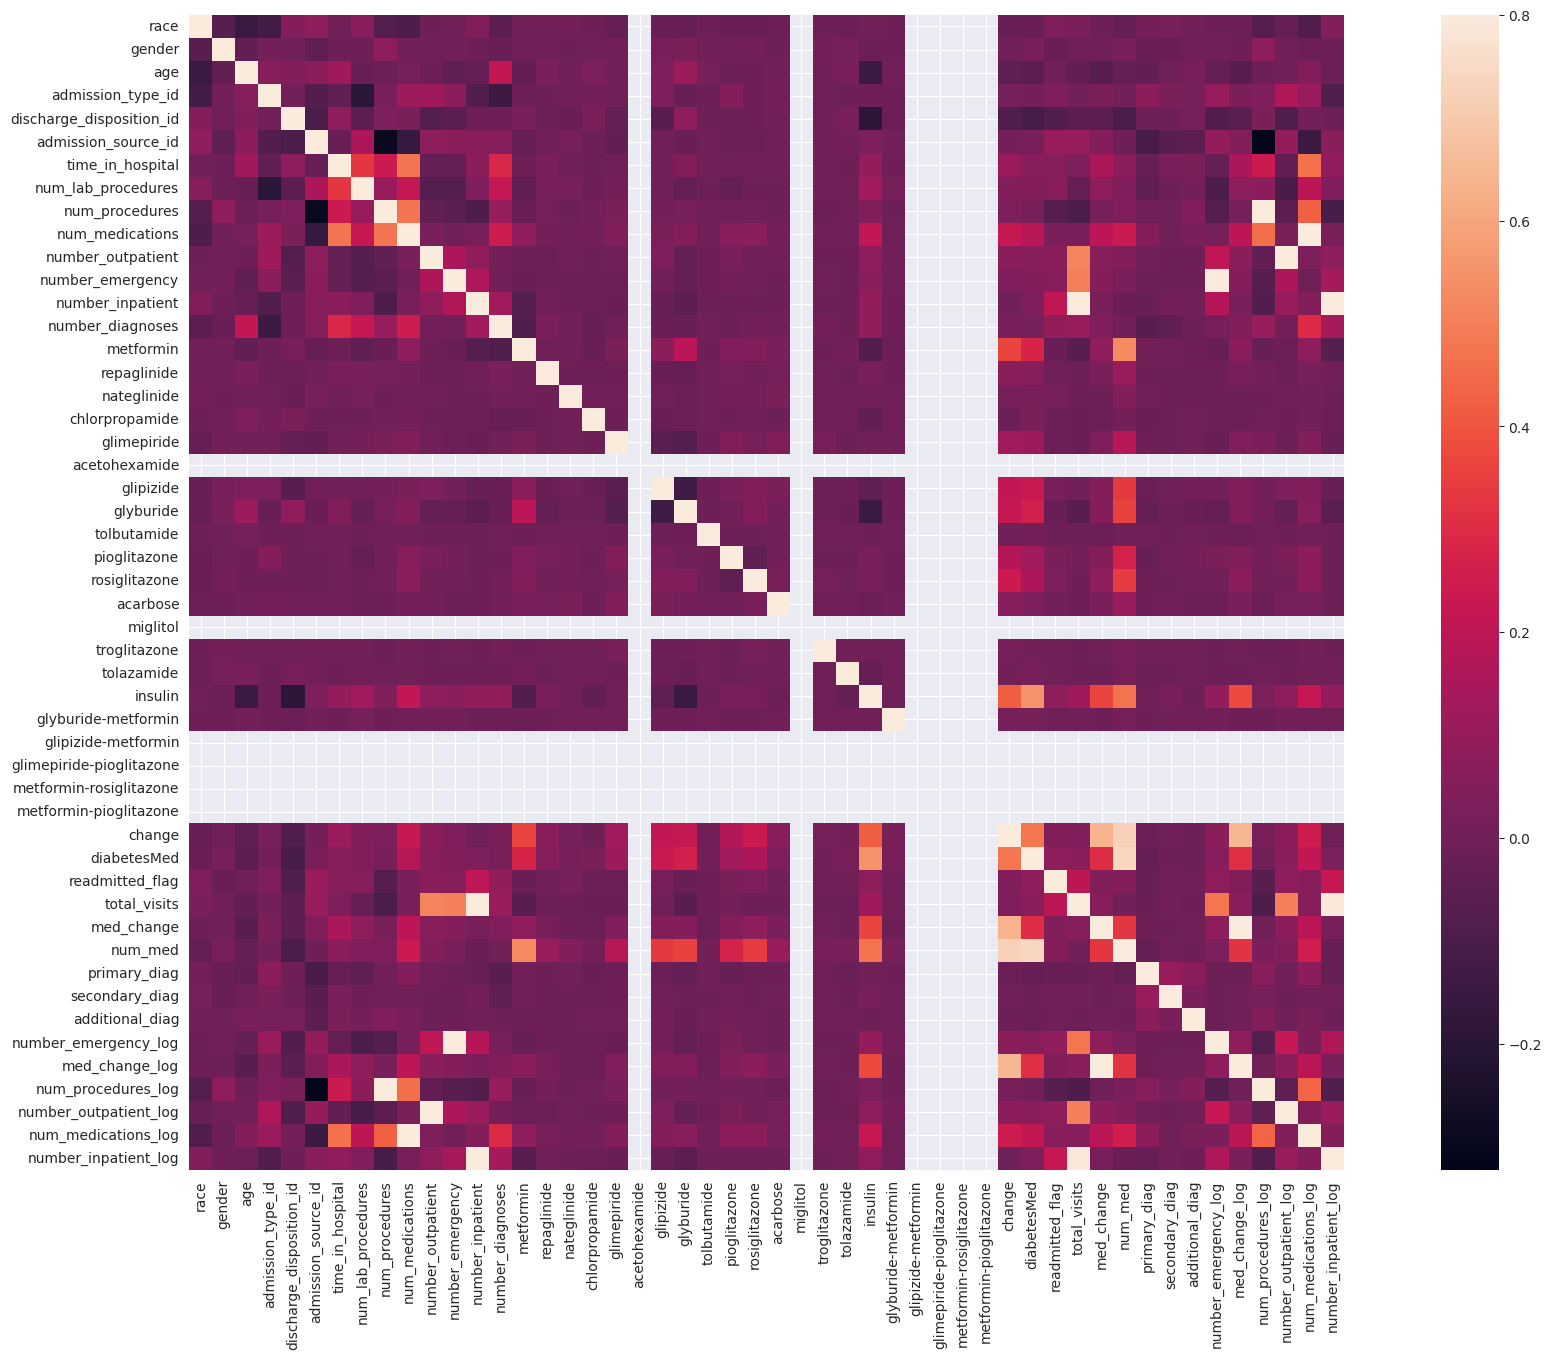

In [87]:
# Draw heatmap to plot the correlations
"""metformin-rosiglitazone is with all NAs"""
a = plt.subplots(figsize=(25, 15))
a = sns.heatmap(train_col, vmax=.8, square=True)

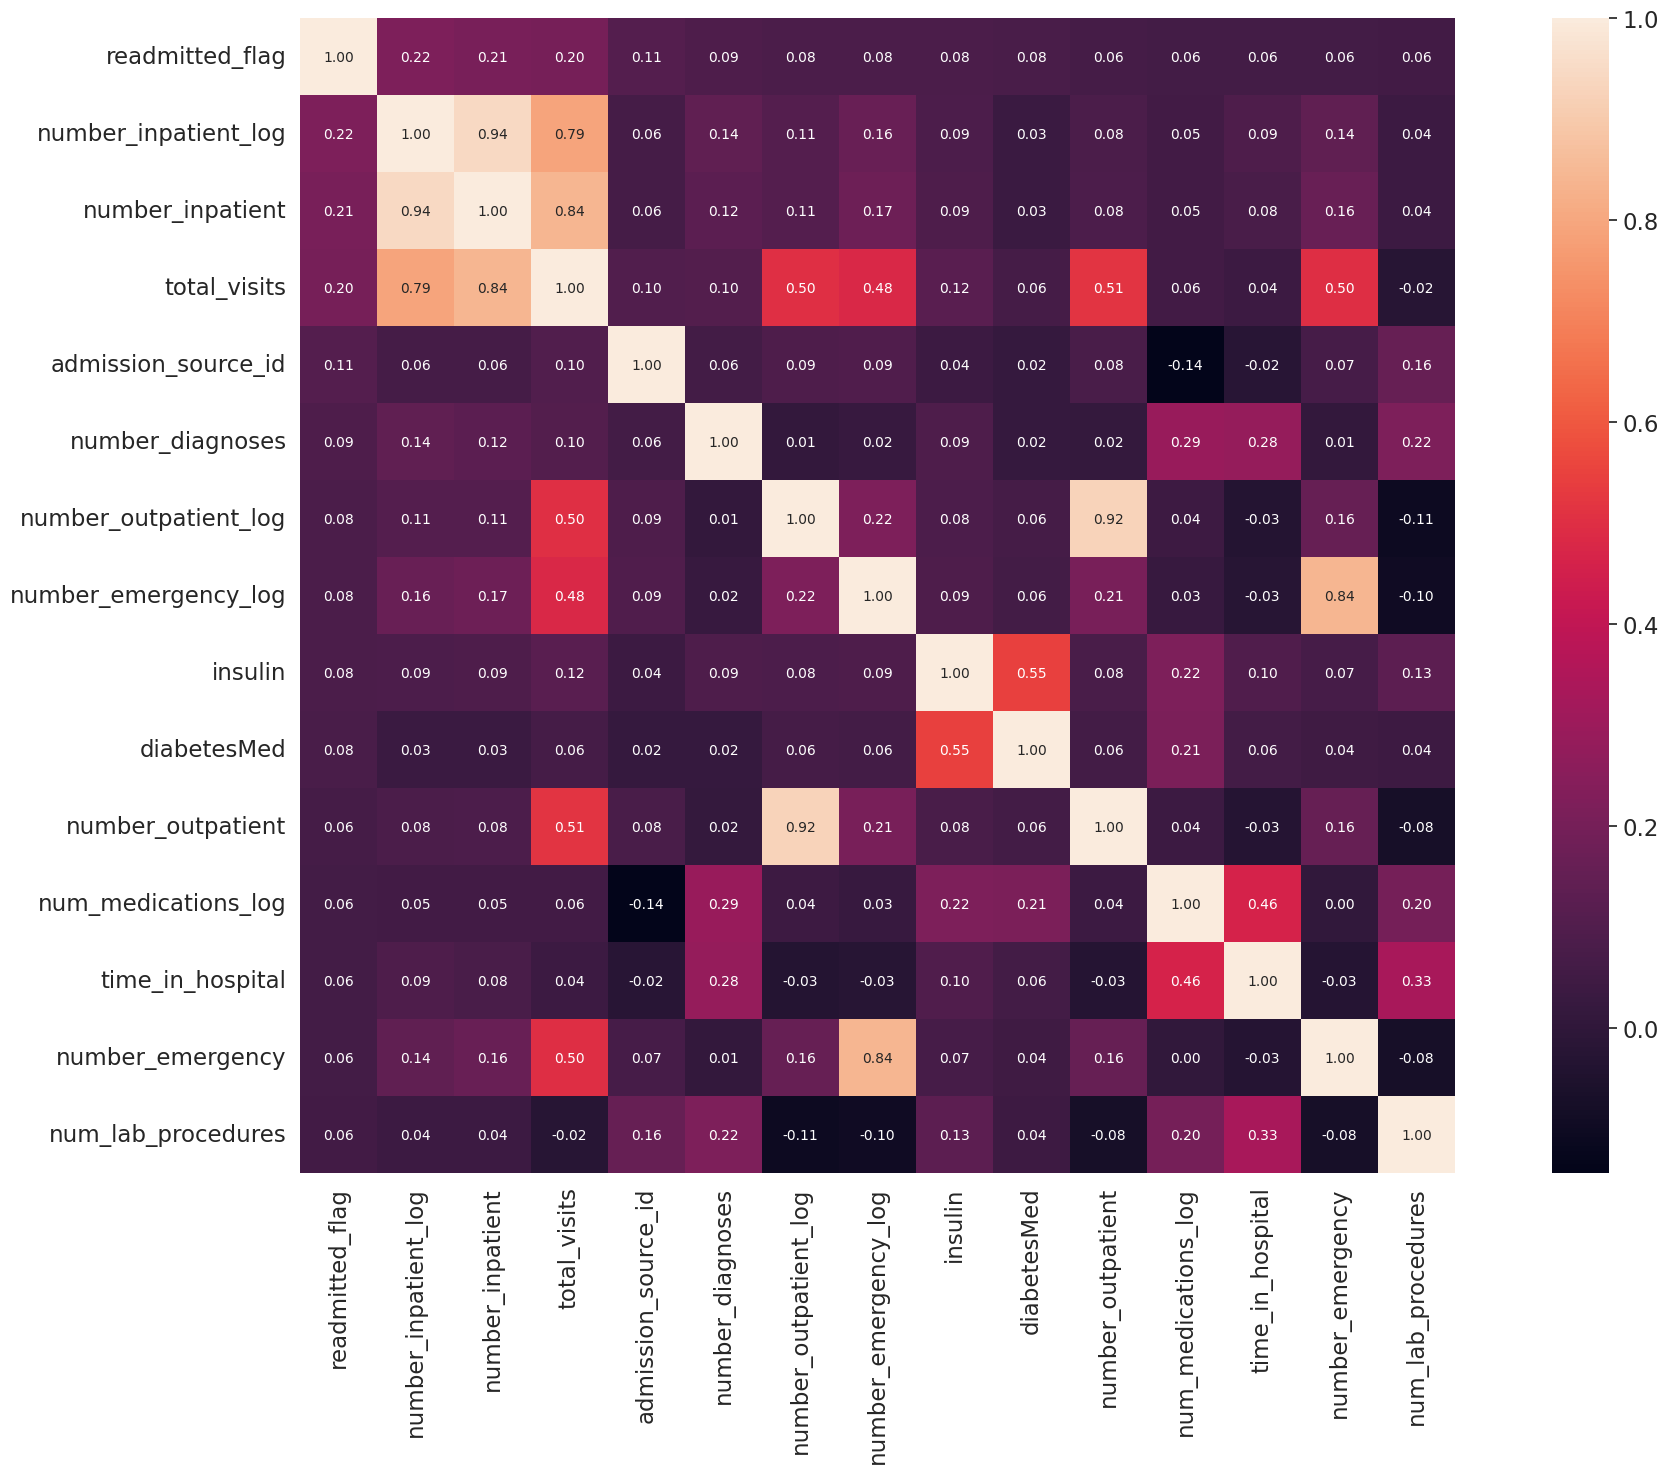

In [91]:
# find the top 15 correlated variables
k = 15
cols = train_col.nlargest(k,'readmitted_flag')['readmitted_flag'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(25, 15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Outlier

In [94]:
key=['num_med',
 'number_emergency',
 'num_lab_procedures',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
df = df[(np.abs(sp.stats.zscore(df[key])) < 3).all(axis=1)]

In [95]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,num_med,primary_diag,secondary_diag,additional_diag,number_emergency_log,med_change_log,num_procedures_log,number_outpatient_log,num_medications_log,number_inpatient_log
1,-0.476490,-0.933630,-3.097224,-0.670336,-0.575876,0.702885,-0.568912,0.698329,-0.833014,0.336135,...,-0.063784,-1.064145,0.846914,-0.975868,0.0,0.693147,0.000000,0.000000,2.944439,0.000000
3,-0.476490,1.071088,-1.839908,-0.670336,-0.575876,0.702885,-0.883873,-0.124761,-0.267781,0.087573,...,-0.063784,-1.064145,0.846914,-0.508295,0.0,0.693147,0.693147,0.000000,2.833213,0.000000
4,-0.476490,1.071088,-1.211250,-0.670336,-0.575876,0.702885,-1.198834,0.259348,-0.833014,-0.906676,...,1.093190,2.587856,2.676470,0.894426,0.0,0.000000,0.000000,0.000000,2.197225,0.000000
5,-0.476490,1.071088,-0.582592,-0.670336,-0.575876,-1.555364,-0.568912,-0.838105,2.558382,0.087573,...,-0.063784,-0.607645,-0.525254,0.894426,0.0,0.000000,1.945910,0.000000,2.833213,0.000000
6,-0.476490,1.071088,0.046066,0.590234,-0.575876,-1.555364,-0.253951,1.301929,-0.267781,0.708978,...,2.250165,-0.607645,-0.525254,-0.975868,0.0,0.000000,0.693147,0.000000,3.091042,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16679,-0.476490,1.071088,0.674724,-0.670336,-0.575876,0.702885,-0.568912,-0.179633,-0.833014,-1.279519,...,-0.063784,1.218356,-0.982643,-0.040721,0.0,0.000000,0.000000,0.000000,1.791759,0.693147
16680,-0.476490,1.071088,-0.582592,-0.670336,-0.575876,0.702885,-0.253951,1.686037,-0.833014,-0.036708,...,1.093190,-0.607645,0.846914,2.297146,0.0,0.693147,0.000000,0.693147,2.772589,0.000000
16682,1.411217,-0.933630,-0.582592,-0.670336,1.876986,0.702885,1.635817,0.314221,2.558382,1.578945,...,-1.220758,-0.607645,2.219081,-0.508295,0.0,0.000000,1.945910,0.000000,3.367296,0.000000
16683,-0.476490,1.071088,-0.582592,-0.670336,1.876986,-0.708521,-0.568912,0.094730,-0.267781,-0.658114,...,1.093190,0.305356,-0.982643,0.894426,0.0,0.000000,0.693147,0.000000,2.397895,0.693147


In [97]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted_flag', 'total_visits', 'med_change',
       'num_med', 'primary_diag', 'secondary_diag', 'additional_diag',
       'number_emergency_log', 'med_change_log', 'num_procedures_log',
       'number_outpatient_lo

In [100]:
for i in df.columns:
    df2=df[i].value_counts()
df2

,count
number_inpatient_log,
0.000000,10281
0.693147,2767
1.098612,1037
1.386294,425


In [102]:
df['primary_diag'] = df['primary_diag'].astype('int')
df_v = pd.get_dummies(df, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id','primary_diag'], drop_first = True)

/tmp/ipython-input-102-1980664439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['primary_diag'] = df['primary_diag'].astype('int')


In [103]:
nom_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'primary_diag' ]

In [105]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted_flag', 'change'})
num_cols

['number_diagnoses',
 'troglitazone',
 'race',
 'num_medications',
 'glyburide-metformin',
 'num_medications_log',
 'acetohexamide',
 'repaglinide',
 'num_lab_procedures',
 'glimepiride-pioglitazone',
 'metformin-pioglitazone',
 'admission_source_id',
 'tolazamide',
 'glipizide',
 'number_emergency',
 'acarbose',
 'num_med',
 'glyburide',
 'primary_diag',
 'num_procedures_log',
 'number_emergency_log',
 'discharge_disposition_id',
 'med_change',
 'age',
 'rosiglitazone',
 'number_inpatient_log',
 'metformin-rosiglitazone',
 'chlorpropamide',
 'secondary_diag',
 'num_procedures',
 'metformin',
 'admission_type_id',
 'time_in_hospital',
 'additional_diag',
 'nateglinide',
 'number_outpatient_log',
 'gender',
 'tolbutamide',
 'med_change_log',
 'pioglitazone',
 'insulin',
 'number_inpatient',
 'diabetesMed',
 'miglitol',
 'total_visits',
 'glimepiride',
 'glipizide-metformin',
 'number_outpatient']

In [108]:
# Append all columns with dummy variables
nom_cols_new = []
for i in nom_cols:
    for j in df_v.columns:
        if i in j:
            nom_cols_new.append(j)


In [109]:
nom_cols_new

['race_-0.4764900340544612',
 'race_1.4112165038438842',
 'race_3.2989230417422295',
 'race_5.186629579640575',
 'gender_1.0710879226315715',
 'admission_type_id_0.5902342603223891',
 'admission_type_id_1.2205192831126779',
 'admission_type_id_1.8508043059029666',
 'discharge_disposition_id_-0.43158956084856265',
 'discharge_disposition_id_0.289840321396096',
 'discharge_disposition_id_0.7226982507428912',
 'discharge_disposition_id_0.8669842271918229',
 'discharge_disposition_id_1.8769860623343448',
 'admission_source_id_-0.7085209790204076',
 'admission_source_id_0.42060346305484225',
 'admission_source_id_0.7028845735736547',
 'primary_diag_0',
 'primary_diag_1',
 'primary_diag_2']

In [110]:
df_v.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted_flag',
       'total_visits', 'med_change', 'num_med', 'secondary_diag',
       'additional_diag', 'number_emergency_log', 'med_change_log',
       'num_procedures_log', 'number_outpatient_log', 'num_medications_log',
       'number_inpatient_log', 'race_-0.4764900340544612',
       'race_1.4112165038438842', 

In [111]:
# Create a feature set
feature_set= ['race_1','race_2','race_3','race_4','gender_1','age','admission_type_id_3',
       'admission_type_id_4','admission_type_id_5','discharge_disposition_id_2',
'discharge_disposition_id_7','discharge_disposition_id_10','discharge_disposition_id_18','discharge_disposition_id_19',
        'discharge_disposition_id_20','discharge_disposition_id_27','discharge_disposition_id_28','admission_source_id_4', 'admission_source_id_8',
        'admission_source_id_9','admission_source_id_11','num_lab_procedures','number_diagnoses', 'max_glu_serum_1', 'max_glu_serum_99', 'A1Cresult_1', 'A1Cresult_99',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed',
        'num_med', 'primary_diag_1','primary_diag_2','primary_diag_3','primary_diag_4','primary_diag_5','primary_diag_6','primary_diag_7','primary_diag_8',
        'number_emergency_log','patient_service_log', 'time_in_hospital_log', 'med_change_log',
       'num_procedures_log', 'number_outpatient_log', 'num_medications_log',
       'number_inpatient_log']

In [112]:
df_v.to_csv('./modified_diabetes1205_V2.csv',index=None)

In [113]:
df_v = pd.read_csv('./modified_diabetes1205_V2.csv')

In [115]:
df_v.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,discharge_disposition_id_0.289840321396096,discharge_disposition_id_0.7226982507428912,discharge_disposition_id_0.8669842271918229,discharge_disposition_id_1.8769860623343448,admission_source_id_-0.7085209790204076,admission_source_id_0.42060346305484225,admission_source_id_0.7028845735736547,primary_diag_0,primary_diag_1,primary_diag_2
0,-3.097224,-0.568912,0.698329,-0.833014,0.336135,-0.180398,-0.123089,-0.499013,276,250.01,...,False,False,False,False,False,False,True,False,False,False
1,-1.839908,-0.883873,-0.124761,-0.267781,0.087573,-0.180398,-0.123089,-0.499013,8,250.43,...,False,False,False,False,False,False,True,False,False,False
2,-1.211250,-1.198834,0.259348,-0.833014,-0.906676,-0.180398,-0.123089,-0.499013,197,157,...,False,False,False,False,False,False,True,False,False,True
3,-0.582592,-0.568912,-0.838105,2.558382,0.087573,-0.180398,-0.123089,-0.499013,414,411,...,False,False,False,False,False,False,False,True,False,False
4,0.046066,-0.253951,1.301929,-0.267781,0.708978,-0.180398,-0.123089,-0.499013,414,411,...,False,False,False,False,False,False,False,True,False,False


In [116]:
import pandas as pd

# Select only numeric columns (ignore boolean one-hot columns)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Initialize a dictionary to store outlier counts
outlier_counts = {}

# Loop through each numeric column to check outliers
for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = numeric_df[(numeric_df[col] < lower) | (numeric_df[col] > upper)]

    outlier_counts[col] = len(outliers)

# Display the number of outliers for each numeric column
outliers_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier_Count'])
outliers_df.sort_values(by='Outlier_Count', ascending=False)


,Outlier_Count
primary_diag,5068
race,3737
discharge_disposition_id,3501
med_change,2753
med_change_log,2753
metformin,2344
glyburide,2200
glipizide,1770
num_procedures,1272
rosiglitazone,812


In [117]:
# List of columns to clean (only continuous variables)
cols_to_clean = ['num_medications', 'time_in_hospital', 'number_inpatient', 'num_lab_procedures', 'number_emergency']

for col in cols_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Keep only the rows within the acceptable range
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (12964, 55)


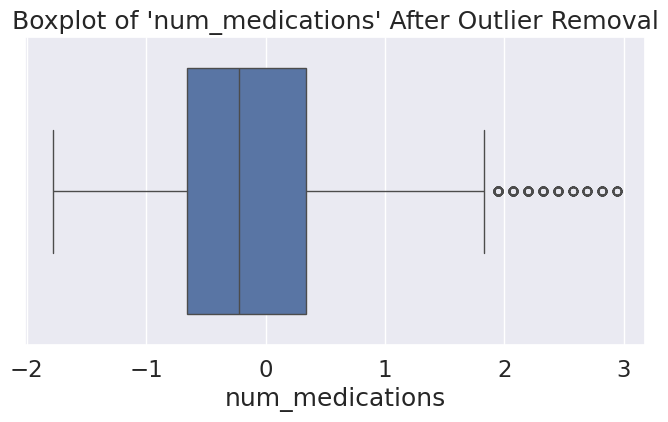

In [125]:
# Boxplot after outlier removal
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_v['num_medications'])
plt.title("Boxplot of 'num_medications' After Outlier Removal")
plt.show()


In [119]:
#Splitting data for modeling
from sklearn.model_selection import train_test_split

X = df.drop('readmitted_flag', axis=1)  # features
y = df['readmitted_flag']               # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [121]:
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (10371, 54)
Testing set: (2593, 54)


In [132]:
# Check data types
print(X_train.dtypes.value_counts())

# See which columns are object (categorical)
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)


float64    48
object      5
int64       1
Name: count, dtype: int64
Categorical columns: ['diag_1', 'diag_2', 'diag_3', 'examide', 'citoglipton']


In [133]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Build the transformer: one-hot encode categorical, scale numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), X_train.select_dtypes(include=['number']).columns.tolist())
    ])


In [134]:
# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = preprocessor.transform(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [138]:
# 1. Identify categorical and numeric columns
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# 2. Define preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),       # Fill NaNs with mean
    ('scaler', StandardScaler())
])

# 3. Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill NaNs with most common value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 4. Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# 5. Create full pipeline with classifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# 6. Fit the pipeline
clf.fit(X_train, y_train)

# 7. Predict and evaluate
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['acetohexamide' 'miglitol' 'glipizide-metformin'
 'glimepiride-pioglitazone' 'metformin-rosiglitazone'
 'metformin-pioglitazone']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Accuracy: 0.6236020053991516

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.71      0.66      1362
           1       0.62      0.53      0.57      1231

    accuracy                           0.62      2593
   macro avg       0.62      0.62      0.62      2593
weighted avg       0.62      0.62      0.62      2593

Confusion Matrix:
 [[968 394]
 [582 649]]


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['acetohexamide' 'miglitol' 'glipizide-metformin'
 'glimepiride-pioglitazone' 'metformin-rosiglitazone'
 'metformin-pioglitazone']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


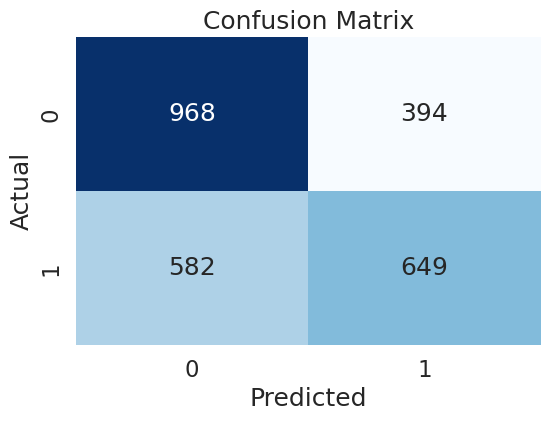

In [139]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['acetohexamide' 'miglitol' 'glipizide-metformin'
 'glimepiride-pioglitazone' 'metformin-rosiglitazone'
 'metformin-pioglitazone']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


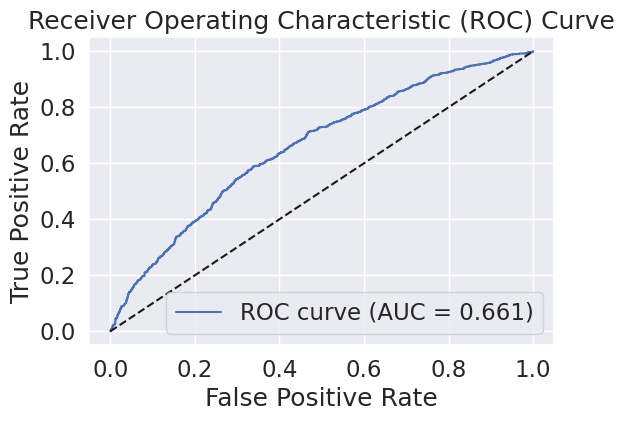

In [140]:
# Get predicted probabilities for positive class
y_probs = clf.predict_proba(X_test)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], 'k--')  # diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


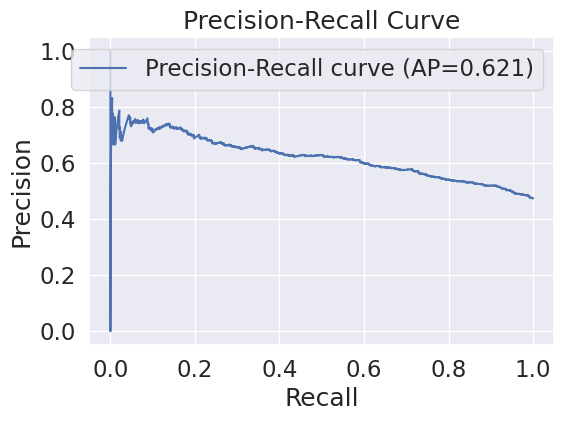

In [141]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP={avg_precision:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
